In [1]:
using Distributions, Gadfly
set_default_plot_size(24cm, 16cm)

INFO: Recompiling stale cache file /home/cavani/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/cavani/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/cavani/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/cavani/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /home/cavani/.julia/lib/v0.4/Compose.ji for module Compose.
Expr(:import, :Patchwork)::Any
  ** incremental compilation may be broken for this module **



In [2]:
k = 10
qn = Normal(0, 10)
qa = rand(qn, k)
bandits = map(q -> Normal(q, 10), qa)

10-element Array{Distributions.Normal,1}:
 Distributions.Normal(μ=14.566544692839631, σ=10.0)
 Distributions.Normal(μ=7.082932924390391, σ=10.0) 
 Distributions.Normal(μ=9.38795900330145, σ=10.0)  
 Distributions.Normal(μ=15.621245212281437, σ=10.0)
 Distributions.Normal(μ=8.901009771809537, σ=10.0) 
 Distributions.Normal(μ=4.233864681356556, σ=10.0) 
 Distributions.Normal(μ=-20.4950317667174, σ=10.0) 
 Distributions.Normal(μ=4.731701645105917, σ=10.0) 
 Distributions.Normal(μ=0.5005037572384601, σ=10.0)
 Distributions.Normal(μ=9.258291761304788, σ=10.0) 

In [3]:
μ_star, a_star = findmax(qa)

(15.621245212281437,4)

In [4]:
bandit(n) = rand(bandits[n])

bandit (generic function with 1 method)

In [5]:
bandit(a_star)

17.075837305538098

In [6]:
function greedy(T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)

    Q = zeros(Float64, k)
    reward = zeros(Float64, k)
    count = zeros(Int, k)
    
    for t=1:T
        _, i = findmax(reward)
        r = bandit(i)
        
        reward[i] += r
        count[i] += 1
        Q[i] = reward[i] / count[i]

        R[t] = r
        A[t] = i
    end

    (A, R)
end

greedy (generic function with 2 methods)

In [7]:
A_greedy, R_greedy = greedy()
string("Greedy: action = ", A_greedy[end], ", total reward = ", sum(R_greedy))

"Greedy: action = 1, total reward = 14164.531365081719"

In [8]:
function ϵgreedy(ϵ, T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)

    Q = zeros(Float64, k)
    reward = zeros(Float64, k)
    count = zeros(Int, k)

    xx = Bernoulli(ϵ)
    xa = DiscreteUniform(1, k)
    
    exploit() = findmax(reward)[2]
    explore() = rand(xa)

    for t=1:T
        i = rand(xx) == 0 ? exploit() : explore()
        r = bandit(i)

        reward[i] += r
        count[i] += 1
        Q[i] = reward[i] / count[i]
        
        R[t] = r
        A[t] = i
    end
    
    (A, R)
end

ϵgreedy (generic function with 2 methods)

In [9]:
A_ϵgreedy, R_ϵgreedy = ϵgreedy(0.1)
string("ϵ-Greedy [ϵ = 0.1]: action = ", A_ϵgreedy[end], ", total reward = ", sum(R_ϵgreedy))

"ϵ-Greedy [ϵ = 0.1]: action = 2, total reward = 7061.634094923579"

In [10]:
A_ϵgreedy001, R_ϵgreedy001 = ϵgreedy(0.01)
string("ϵ-Greedy [ϵ = 0.01]: action = ", A_ϵgreedy001[end], ", total reward = ", sum(R_ϵgreedy001))

"ϵ-Greedy [ϵ = 0.01]: action = 1, total reward = 14977.546849463411"

In [11]:
R_greedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = greedy()
    R_greedy_avg += R
end

R_greedy_avg /= 2000

1000-element Array{Float64,1}:
 15.0787
 14.2829
 13.9183
 14.6866
 13.8954
 14.1933
 13.9348
 14.3657
 14.3027
 13.9774
 14.1304
 14.0623
 13.8942
  ⋮     
 14.4277
 14.0676
 14.044 
 14.1344
 13.8151
 14.0796
 13.2701
 14.1045
 14.3352
 14.3222
 14.0639
 14.132 

In [12]:
R_ϵgreedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.1)
    R_ϵgreedy_avg += R
end

R_ϵgreedy_avg /= 2000

1000-element Array{Float64,1}:
 13.6135
 13.3057
 12.373 
 13.2503
 12.6814
 12.6095
 13.1518
 12.9957
 13.3577
 12.8698
 13.1323
 12.8443
 12.6415
  ⋮     
 12.9185
 13.3055
 12.7968
 12.8744
 13.0568
 12.8143
 12.835 
 13.0005
 13.0926
 12.7743
 12.9504
 12.7718

In [13]:
R_ϵgreedy001_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.01)
    R_ϵgreedy001_avg += R
end

R_ϵgreedy001_avg /= 2000

1000-element Array{Float64,1}:
 14.4871
 13.5402
 14.2462
 13.5781
 14.0444
 14.0783
 13.6243
 13.9296
 13.8323
 13.9345
 13.9012
 13.8761
 14.0161
  ⋮     
 14.1665
 14.0394
 13.8251
 13.6597
 14.145 
 13.5949
 14.1632
 14.3613
 14.2141
 14.0059
 13.9677
 14.1309

In [14]:
rplot(n = 1000) = plot(layer(x = 1:n, y = R_greedy_avg[1:n], color = fill("Greedy", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.1]", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy001_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.01]", n), Geom.line),
    Theme(key_position=:bottom))

rplot (generic function with 2 methods)

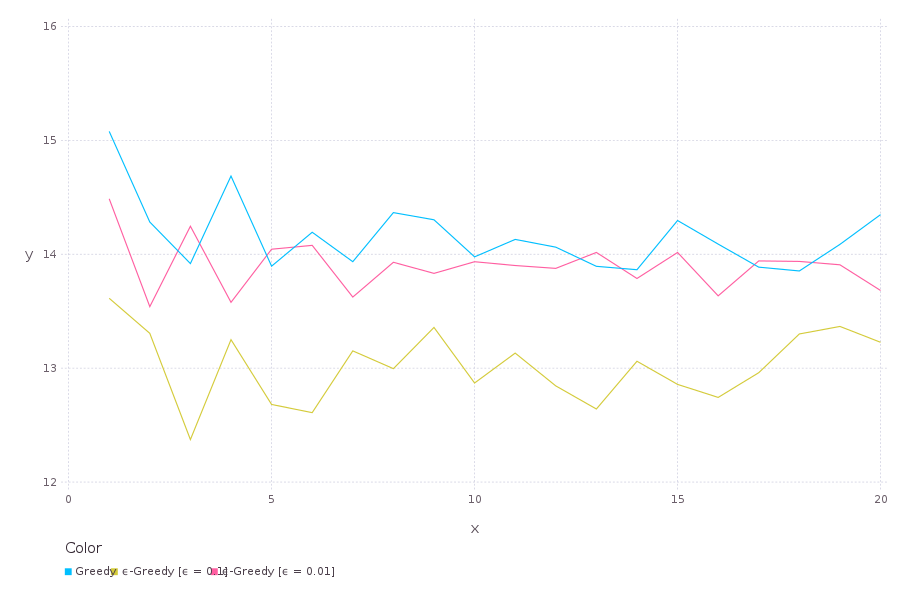

In [15]:
g = rplot(20)

In [16]:
draw(PNG("epsilon-greedy.png", 24cm, 16cm), g)